![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science and AI Praktice

## 5-MODUL. Machine Learning

### Task for portfolio: Creating a model for determining the cost of houses in Tashkent.

Determination of the cost of houses in the city of Tashkent based on the data given in this practice.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')

In [ ]:
df

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000


In [ ]:
df.replace("Площадьземли:1сот", 100, inplace=True)
df = df.drop('location', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    7565 non-null   object
 1   rooms       7565 non-null   int64 
 2   size        7565 non-null   object
 3   level       7565 non-null   int64 
 4   max_levels  7565 non-null   int64 
 5   price       7565 non-null   object
dtypes: int64(3), object(3)
memory usage: 354.7+ KB


In [ ]:
df['size'] = df['size'].astype('float')

In [ ]:
df['price'] = df['price'].replace('Договорная', np.nan).astype('float')

In [ ]:
def fill_nan_prices_as_mean(df):
  rows = df[df['price'].isna()].index
  mean_price = df.groupby('rooms')['price'].mean()
  df.loc[rows, 'price'] = mean_price.get(df.loc[rows, 'rooms'].values).values

In [ ]:
fill_nan_prices_as_mean(df)

<Axes: xlabel='rooms', ylabel='price'>

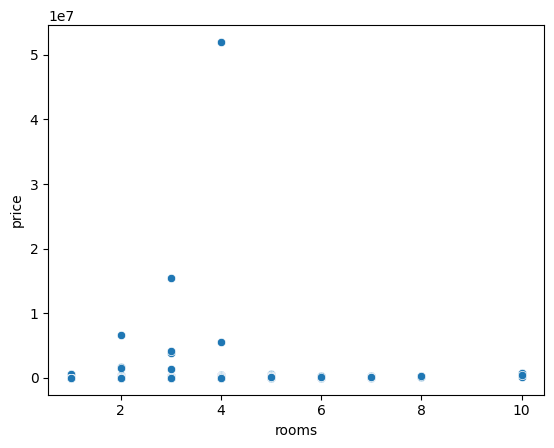

In [ ]:
sns.scatterplot(data=df, x='rooms', y='price')

In [ ]:
def normalize_price(df):
  low_expencive_price = df[(df['price'] < 20000) | (df['price'] >= 800000)].index
  mean_price = df.groupby('rooms')['price'].mean()
  df.loc[low_expencive_price, 'price'] = mean_price.get(df.loc[low_expencive_price, 'rooms'].values).values

In [ ]:
normalize_price(df)

<Axes: xlabel='rooms', ylabel='price'>

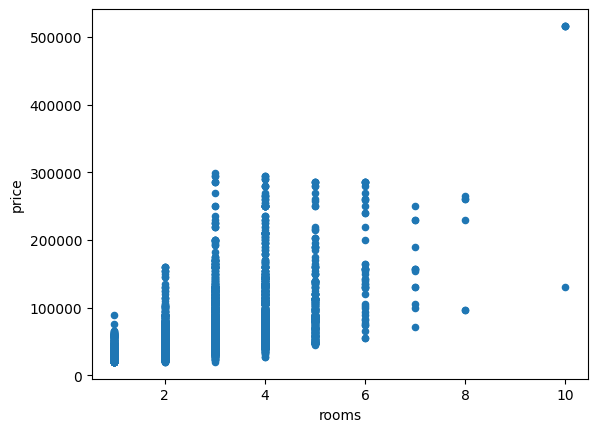

In [ ]:
df.plot(kind='scatter', x='rooms', y='price')

<Axes: xlabel='size', ylabel='price'>

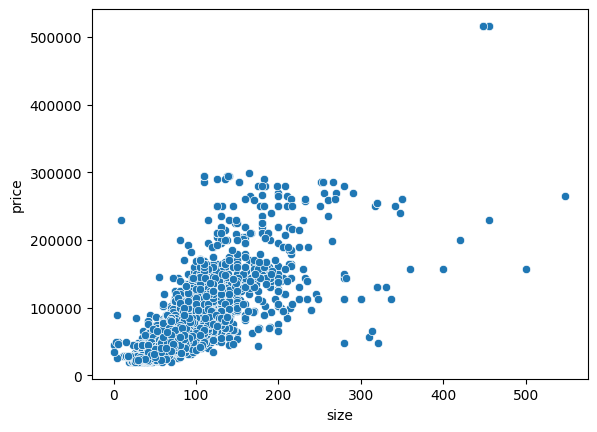

In [ ]:
sns.scatterplot(data=df, x='size', y='price')

In [ ]:
def normalize_size(df):
  big_size = df[df['size']>500].index
  mean_size = df.groupby('rooms')['size'].mean()
  df.loc[big_size, 'size'] = mean_size.get(df.loc[big_size, 'rooms'].values).values

In [ ]:
normalize_size(df)

<Axes: xlabel='size', ylabel='price'>

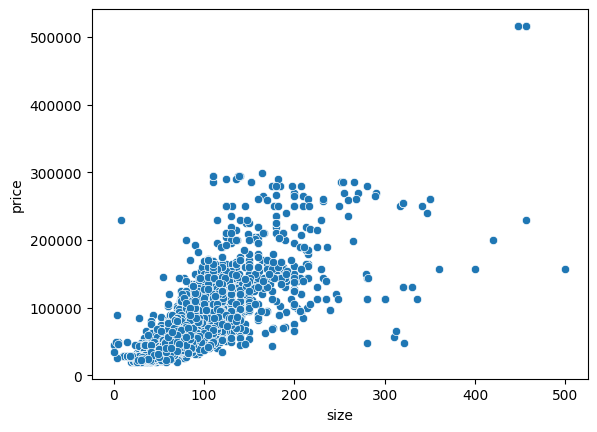

In [ ]:
sns.scatterplot(data=df, x='size', y='price')

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
Y = df[['price']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

num_attribs = list(X_train.drop('district', axis=1))
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('nums', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [ ]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X=X_train_prepared, y=Y_train)


LinearRegression()

In [ ]:
X_test_prepared = full_pipeline.fit_transform(X_test)
Y_test_predict = LR_model.predict(X_test_prepared)

In [ ]:
X_test['true_price'] = Y_test
X_test['predicted_price'] = Y_test_predict
X_test.head()

,district,rooms,size,level,max_levels,true_price,predicted_price
4177,Яккасарайский,4,90.0,3,4,88000.00000,78382.872637
4007,Мирзо-Улугбекский,4,93.0,2,4,75000.00000,74857.170878
2919,Юнусабадский,4,87.0,3,4,72500.00000,70004.906453
4152,Учтепинский,1,26.4,1,4,29436.08862,17166.535814
1537,Яккасарайский,3,75.0,1,4,72000.00000,69971.676466


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mse = mean_squared_error(Y_test, Y_test_predict)
mae = mean_absolute_error(Y_test, Y_test_predict)
mape = mean_absolute_percentage_error(Y_test, Y_test_predict)
print("RMSE:", np.sqrt(mse))
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 22901.257491209606
MAE: 13437.67434038492
MAPE: 0.22607857327628483
